In [1]:
'''
Determining CoSE from files generated by bedtools
Please look at project/Knowledgebase/Notes for additional files
The only difference from CoSE_1 is that this uses all introns and CoSE_1 uses first intron
'''

'\nDetermining CoSE from files generated by bedtools\nPlease look at project/Knowledgebase/Notes for additional files\nThe only difference from CoSE_1 is that this uses all introns and CoSE_1 uses first intron\n'

In [2]:
import os
import re

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import mygene
import scipy

from plotnine import *
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 # export pdfs with editable font types in Illustrator

In [3]:
os.getcwd()

'/gpfs/ysm/project/pillai/mp758/Tools/Jupyter_Notebooks/LRS'

In [4]:
Jn_list = ['/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT3.alljns.intron.overlap.plus10.txt',
           '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT2.alljns.intron.overlap.plus10.txt',
           '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT1.alljns.intron.overlap.plus10.txt', 
           '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT2.alljns.intron.overlap.plus10.txt'
          ]
           
           
    

In [ ]:
def make_Jn_overlap(jn):
    namea, nameb = os.path.split(jn)
    namec = nameb.split("_")[0]
    SJ1=pd.read_csv(jn,
                sep = "\t",
                delimiter = '\t', index_col = False,
                      names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap","span_a","span_b", "diff_span" ]
                   )
    jn["chr_name"] = jn['chr_a']+"_"+jn['start_a'].apply(str)+"_"+jn['end_a'].apply(str)+"_"+jn['strand_a']
    SJ1.loc[SJ1['strand_'] == 1, 'strand'] = "+"
    SJ1.loc[SJ1['strand_'] == 2, 'strand'] = "-"
    SJ1['name']=SJ1['chr']+"_"+SJ1['start'].astype(str)+"_"+SJ1['end'].astype(str)+"_"+SJ1['strand'] 
    SJ1['score']= SJ1['unique']+SJ1['multi_map'] # both single and multimapping reads included
    SJ1=SJ1[SJ1['annotated'] == 1] # only annotated reads included
    SJ1=SJ1.dropna() # those with any NA are dropped
    SJ1=SJ1[['chr', 'start', 'end','name','score','strand']] # reduce file to just standard bed6 format
    folder1='/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_FastGro/Splice_Junctions'
    path1=folder1+'/'+namec+".STAR_Jn.bed" # new folder for all splice junctions
    # write splice junctions to files
    SJ1.to_csv(path1,
            sep = "\t",
             header = None,
             index = False)
    
    print(namea, nameb, namec)
    #print(SJ1.head)
    

In [5]:
# make intron overlap list generated above

intron_list = [
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT1.all-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT2.all-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT2.all-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT3.all-intron.overlap.txt'
]

In [6]:
intron_list2 = [
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT1-2.all-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT2-3.all-intron.overlap.txt'
]

In [7]:
intron_list3 = [
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/first/WT1-2.first-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/first/MUT2-3.first-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/last/WT1-2.last-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/last/MUT2-3.last-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/middle/WT1-2.middle-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/middle/MUT2-3.middle-intron.overlap.txt'
]

In [8]:
intron_list4 = [
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT1-2.first-intron.overlap.txt',
    '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT2-3.first-intron.overlap.txt'
]

In [337]:
# only intron name. Please note difference with the next function intron_overlap2

def intron_overlap(intron):
    namea, nameb = os.path.split(intron)
    namec = nameb.split(".")[0]
    named = nameb.split(".")[1]
    intron1 = pd.read_csv(intron, 
                      delimiter = '\t', 
                          index_col = False,
                      names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ])
    
    # passing function
    agg_func_math = {
        'name_a':
        ['count']
            }
    intron_count = intron1.groupby(['name_a']).agg(agg_func_math).round(2)
    intron_count.columns = intron_count.columns.to_flat_index().str.join('_')
    intron_count['name_a'] = intron_count.index
    intron_count.index = np.arange(len(intron_count))
    intron_count_over10 = intron_count[intron_count['name_a_count'] > 10]
    intron_count.columns = ['intron_count', 'name_a']

    
    folder1 = '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE'
    jn  = folder1+'/'+namec+'.alljns.intron.overlap.plus10.txt'
    jn1 = pd.read_csv(jn,
                delimiter = '\t', 
                      index_col = False,
                      names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap","span_a","span_b", "diff_span" ]
                     )
    jn1["chr_name"] = jn1['chr_a']+"_"+jn1['start_a'].apply(str)+"_"+jn1['end_a'].apply(str)+"_"+jn1['strand_a']
    jn1_count = jn1.groupby(['name_a']).agg(agg_func_math).round(2)
    
    jn1_count.columns = jn1_count.columns.to_flat_index().str.join('_')
    jn1_count['name_a'] = jn1_count.index
    jn1_count.index = np.arange(len(jn1_count))
    

    jn1_count.columns = ['jn_count', 'name_a']
    merged1 = pd.merge(intron_count, jn1_count, on = 'name_a', how = "left")

    merged1 = merged1.fillna(0).round(2)
    merged1['CoSE'] = (merged1['jn_count']/merged1['intron_count']).round(2)
    merged1['sample'] = namec
    merged1 = merged1[merged1["jn_count"]>1]
    #merged1.columns = 
    dest = folder1+'/'+'Final'+'/'+namec+'.'+named+'.CoSE.txt'
    merged1.to_csv(dest, sep = '\t', index = False, header = True) 
    
    print(namea, nameb, namec)
    print(intron_count.head(5))
    #print(intron_count_over10.head(5))
    print(jn1_count.head(10))
    print(merged1.head(5))
    #print(intron_count.columns)
    #print(intron_count_over10.counts)
    print(jn1_count.columns)
    print(merged1.columns)
    print(dest)
    

In [ ]:
for intron in intron_list3:
    intron_overlap(intron)

In [82]:
def intron_overlap2(intron):
    namea, nameb = os.path.split(intron)
    namec = nameb.split(".")[0]
    named = nameb.split(".")[1]
    intron1 = pd.read_csv(intron, 
                      delimiter = '\t', 
                          index_col = False,
                      names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ])
    intron1["chr_name"] = intron1['chr_a']+"_"+intron1['start_a'].apply(str)+"_"+intron1['end_a'].apply(str)+"_"+intron1['strand_a']
    intron1["tr_name"] = intron1['name_a'].str.split(".").str[0]
    # passing function
    agg_func_math = {
        'tr_name':
        ['count']
            }
    intron_count = intron1.groupby(['tr_name']).agg(agg_func_math).round(2)
    intron_count.columns = intron_count.columns.to_flat_index().str.join('_')
    intron_count['tr_name'] = intron_count.index
    intron_count.index = np.arange(len(intron_count))
    intron_count_over10 = intron_count[intron_count['tr_name_count'] > 10]
    intron_count.columns = ['intron_count', 'tr_name']

    
    folder1 = '/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE'
    jn  = folder1+'/'+namec+'.alljns.intron.overlap.plus10.txt'
    jn1 = pd.read_csv(jn,
                delimiter = '\t', 
                      index_col = False,
                      names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap","span_a","span_b", "diff_span" ]
                     )
    jn1["chr_name"] = jn1['chr_a']+"_"+jn1['start_a'].apply(str)+"_"+jn1['end_a'].apply(str)+"_"+jn1['strand_a']
    jn1["tr_name"] = jn1['name_a'].str.split(".").str[0]
    jn1_count = jn1.groupby(['tr_name']).agg(agg_func_math).round(2)

    jn1_count.columns = jn1_count.columns.to_flat_index().str.join('_')
    jn1_count['tr_name'] = jn1_count.index
    jn1_count.index = np.arange(len(jn1_count))
    

    jn1_count.columns = ['jn_count', 'tr_name', 'name_a']
    merged1 = pd.merge(intron_count, jn1_count, on = 'name_a', how = "left")

    merged1 = merged1.fillna(0).round(2)
    merged1['CoSE'] = (merged1['jn_count']/merged1['intron_count']).round(2)
    merged1['sample'] = namec
    merged1 = merged1[merged1["jn_count"]>1]
    #merged1.columns = 
    dest = folder1+'/'+'Final'+'/'+namec+'.'+named+'.CoSE.txt'
    merged1.to_csv(dest, sep = '\t', index = False, header = True) 
    
    print(namea, nameb, namec)
    print(intron1.head(5))
    print(intron_count.head(5))
    #print(intron_count_over10.head(5))
    print(jn1_count.head(10))
    print(merged1.head(5))
    #print(intron_count.columns)

    print(jn1.head(5))
    print(jn1_count.columns)
    print(merged1.columns)
    print(dest)
    

In [ ]:
for intron in intron_list3:
    intron_overlap2(intron)

In [4]:
# all introns
intron=pd.read_csv('/home/mp758/project/GenomeBuilds/Human/GRCh38/bed/GRCh38.intron.bed',
                   sep = '\t',
                   header = None,
                   names = ['chr', 'start', 'end', 'name_a', 'value', 'strand']
                  )

intron = intron[~intron['chr'].str.contains("_")]

intron[['A', 'B', 'C', 'D', 'E', 'F', 'G']] = intron['name_a'].str.split("_", expand=True)

intron['AC'] = intron['A']+"_"+intron['C']

In [5]:
# using groupby, generate first and last introns

intron_first = pd.concat([intron[intron['G'] == 'r'].groupby('A')['chr','start','end','name_a','value','strand','AC','C'].last().reset_index(),
       intron[intron['G'] == 'f'].groupby('A')['chr','start','end','name_a','value','strand','AC','C'].first().reset_index()]
      ).sort_values(by =['chr','start'])

In [6]:
intron_last = pd.concat([intron[intron['G'] == 'f'].groupby('A')['chr','start','end','name_a','value','strand','AC','C'].last().reset_index(),
       intron[intron['G'] == 'r'].groupby('A')['chr','start','end','name_a','value','strand','AC','C'].first().reset_index()]
      ).sort_values(by =['chr','start'])

In [7]:
# intermediate intron to figure out middle intron
intron1 = intron.groupby('A')['chr','start','end','name_a','value','strand','AC','C'].last().reset_index()

In [8]:
intron1 = intron1[intron1['C'].apply(int) > 2]

intron1['median'] = intron1['C'].apply(int)/2

intron1['median'] = intron1['median'].apply(int)
intron1['median_intron'] = intron1['A']+"_"+intron1['median'].apply(str)

intron1 = intron1[['A','median_intron']]

intron1.columns = ['A','AC']

In [9]:

intron_middle = pd.merge(intron,intron1, on = 'AC', how = "left").dropna()

In [10]:
intron_middle = intron_middle[['chr', 'start', 'end', 'name_a', 'value', 'strand']]

intron_middle.to_csv('/home/mp758/project/GenomeBuilds/Human/GRCh38/bed/GRCh38.intron.middle.bed',
                     sep = "\t",
                     index = False,
                     header = None
                    )
        

In [11]:
intron_first = intron_first[['chr', 'start', 'end', 'name_a', 'value', 'strand']]

intron_first.to_csv('/home/mp758/project/GenomeBuilds/Human/GRCh38/bed/GRCh38.intron.first.bed',
                     sep = "\t",
                     index = False,
                     header = None
                    )

In [12]:
intron_last = intron_last[['chr', 'start', 'end', 'name_a', 'value', 'strand']]

intron_last.to_csv('/home/mp758/project/GenomeBuilds/Human/GRCh38/bed/GRCh38.intron.last.bed',
                     sep = "\t",
                     index = False,
                     header = None
                    )

In [13]:
overlap_all_WT = pd.read_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT1-2.all-intron.overlap.txt',
                          sep = "\t",
                          header = None,
                        names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]
                         )

In [14]:
overlap_all_MUT = pd.read_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/MUT2-3.all-intron.overlap.txt',
                          sep = "\t",
                          header = None,
                          names =  ['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]
                         )

In [ ]:
overlap_first_WT = pd.merge(overlap_all_WT, intron_first, on = 'name_a', how = 'left').dropna()

overlap_first_MUT = pd.merge(overlap_all_MUT, intron_first, on = 'name_a', how = 'left').dropna()

In [ ]:
overlap_last_WT = pd.merge(overlap_all_WT, intron_last, on = 'name_a', how = 'left').dropna()
overlap_last_MUT = pd.merge(overlap_all_MUT, intron_last, on = 'name_a', how = 'left').dropna()

In [ ]:
overlap_middle_WT = pd.merge(overlap_all_WT, intron_middle, on = 'name_a', how = 'left').dropna()
overlap_middle_MUT = pd.merge(overlap_all_MUT, intron_middle, on = 'name_a', how = 'left').dropna()

In [ ]:
overlap_first_WT = overlap_first_WT[['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]]
overlap_first_MUT = overlap_first_MUT[['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]]

overlap_last_WT = overlap_last_WT[['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]]
overlap_last_MUT = overlap_last_MUT[['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]]

overlap_middle_WT = overlap_middle_WT[['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]]
overlap_middle_MUT = overlap_middle_MUT[['chr_a', 'start_a', 'end_a', 'name_a', 'score_a', 'strand_a','chr_b', 'start_b', 'end_b', 'name_b', 'score_b', 'strand_b',"overlap" ]]

In [330]:
overlap_first_WT.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/first/WT1-2.first-intron.overlap.txt',
                        index = False,
                        header = None,
                        sep = "\t"
                       )
overlap_first_MUT.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/first/MUT2-3.first-intron.overlap.txt',
                        index = False,
                        header = None,
                        sep = "\t"
                       )

In [332]:
overlap_last_WT.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/last/WT1-2.last-intron.overlap.txt',
                        index = False,
                        header = None,
                        sep = "\t"
                       )
overlap_last_MUT.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/last/MUT2-3.last-intron.overlap.txt',
                        index = False,
                        header = None,
                        sep = "\t"
                       )

In [333]:
overlap_middle_WT.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/middle/WT1-2.middle-intron.overlap.txt',
                        index = False,
                        header = None,
                        sep = "\t"
                       )
overlap_middle_MUT.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/middle/MUT2-3.middle-intron.overlap.txt',
                        index = False,
                        header = None,
                        sep = "\t"
                       )

In [85]:
WT_MUT_CoSE_IR_Pos = pd.merge(WT_CoSE_IR, MUT_CoSE_IR_Pos, on = 'name_intron', how = 'left').dropna()
WT_MUT_CoSE_IR_Pos[(WT_MUT_CoSE_IR_Pos['jn_count_y'] >0) & (WT_MUT_CoSE_IR_Pos['jn_count_x'] > 0)]

,chromosome_x_x,start_x_x,end_x_x,name_intron,value_x_x,strand_x_x,pvalue_x,deltaPSI_x,name_b_x,chromosome_y_x,...,chromosome_y_y,start_y_y,end_y_y,name_a_y,value_y_y,strand_y_y,name_a_count_y,jn_count_y,CoSE_y,sample_y
1,chr3,49014293,49014382,WDR6/ENSG00000178252/clean,0,+,9.614540e-25,0.122087,chr3_49014293_49014382_+,chr3,...,chr3,49014293.0,49014382.0,ENST00000395474.7_intron_2_0_chr3_49014294_f,0.0,+,3.0,1.0,0.33,MUT
5,chr8,144084330,144084412,GPAA1/ENSG00000197858/clean,0,+,3.099920e-16,0.077211,chr8_144084330_144084412_+,chr8,...,chr8,144084330.0,144084412.0,ENST00000525087.5_intron_4_0_chr8_144084331_f,0.0,+,7.0,4.0,0.57,MUT
8,chr3,49813168,49813248,UBA7/ENSG00000182179/clean,0,-,1.845260e-14,-0.193981,chr3_49813168_49813248_-,chr3,...,chr3,49811091.0,49811272.0,ENST00000333486.4_intron_14_0_chr3_49811092_r,0.0,-,4.0,1.0,0.25,MUT
9,chr19,17276624,17276822,BABAM1/ENSG00000105393/clean,0,+,3.568660e-14,0.067182,chr19_17276624_17276822_+,chr19,...,chr19,17276624.0,17276822.0,ENST00000447614.6_intron_3_0_chr19_17276625_f,0.0,+,2.0,1.0,0.50,MUT
19,chr3,49123373,49123446,LAMB2/ENSG00000172037/clean,0,-,1.180300e-12,0.190445,chr3_49123373_49123446_-,chr3,...,chr3,49123373.0,49123446.0,ENST00000305544.9_intron_6_0_chr3_49123374_r,0.0,-,4.0,1.0,0.25,MUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,chr10,73760849,73763489,SEC24C/ENSG00000176986/clean,0,+,3.952630e-02,0.005847,chr10_73760849_73763489_+,chr10,...,chr10,73760849.0,73763489.0,ENST00000345254.9_intron_5_0_chr10_73760850_f,0.0,+,2.0,1.0,0.50,MUT
562,chr9,127804413,127804498,FPGS/ENSG00000136877/clean,0,+,4.477350e-02,0.009795,chr9_127804413_127804498_+,chr9,...,chr9,127804413.0,127804498.0,ENST00000479147.6_intron_1_0_chr9_127804414_f,0.0,+,3.0,1.0,0.33,MUT
567,chr11,114440739,114443855,REXO2/ENSG00000076043/clean,0,+,4.584570e-02,0.007333,chr11_114440739_114443855_+,chr11,...,chr11,114440739.0,114443855.0,ENST00000544347.1_intron_5_0_chr11_114440740_f,0.0,+,4.0,3.0,0.75,MUT
568,chr1,45008701,45009143,HECTD3/ENSG00000126107/clean,0,-,4.591230e-02,0.020816,chr1_45008701_45009143_-,chr1,...,chr1,45008701.0,45009143.0,ENST00000372172.5_intron_13_0_chr1_45008702_r,0.0,-,6.0,5.0,0.83,MUT


In [63]:
for col in WT_MUT_CoSE_IR_Neg.columns:
    print (col)

chromosome_x_x
start_x_x
end_x_x
name_intron
value_x_x
strand_x_x
pvalue_x
deltaPSI_x
name_b_x
chromosome_y_x
start_y_x
end_y_x
name_a_x
value_y_x
strand_y_x
name_a_count_x
jn_count_x
CoSE_x
sample_x
chromosome_x_y
start_x_y
end_x_y
value_x_y
strand_x_y
pvalue_y
deltaPSI_y
name_b_y
chromosome_y_y
start_y_y
end_y_y
name_a_y
value_y_y
strand_y_y
name_a_count_y
jn_count_y
CoSE_y
sample_y


In [67]:
# filter to those columns for downstream 
WT_MUT_CoSE_IR_Neg_filter = WT_MUT_CoSE_IR_Neg[['name_intron', 'CoSE_x', 'jn_count_x' ,'CoSE_y', 'jn_count_y']]

# filter those with non zero values as junction counts
WT_MUT_CoSE_IR_Neg_filter = WT_MUT_CoSE_IR_Neg_filter[(WT_MUT_CoSE_IR_Neg_filter['jn_count_x'] > 0) & (WT_MUT_CoSE_IR_Neg_filter['jn_count_y'] > 0)]

In [87]:
# filter to those columns for downstream 
WT_MUT_CoSE_IR_Pos_filter = WT_MUT_CoSE_IR_Pos[['name_intron', 'CoSE_x', 'jn_count_x' ,'CoSE_y', 'jn_count_y']]

# filter those with non zero values as junction counts
WT_MUT_CoSE_IR_Pos_filter = WT_MUT_CoSE_IR_Pos_filter[(WT_MUT_CoSE_IR_Pos_filter['jn_count_x'] > 0) & (WT_MUT_CoSE_IR_Pos_filter['jn_count_y'] > 0)]

In [82]:
WT_CoSE_IR_Neg = WT_MUT_CoSE_IR_Neg_filter[['jn_count_x', 'CoSE_x']]
WT_CoSE_IR_Neg['sample'] = 'WT'
WT_CoSE_IR_Neg.columns = ['jn_count', 'CoSE', 'sample']
MUT_CoSE_IR_Neg = WT_MUT_CoSE_IR_Neg_filter[['jn_count_y', 'CoSE_y']]
MUT_CoSE_IR_Neg['sample'] = 'MUT'
MUT_CoSE_IR_Neg.columns = ['jn_count', 'CoSE', 'sample']
WT_MUT_CoSE_Neg_sample = pd.concat([WT_CoSE_IR_Neg, MUT_CoSE_IR_Neg])

In [88]:
# write the files 
WT_MUT_CoSE_Neg_sample.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT-MUT_CoSE_Neg_sample.txt',
                           sep = '\t', index = False, header = True) 

In [89]:
WT_CoSE_IR_Pos = WT_MUT_CoSE_IR_Pos_filter[['jn_count_x', 'CoSE_x']]
WT_CoSE_IR_Pos['sample'] = 'WT'
WT_CoSE_IR_Pos.columns = ['jn_count', 'CoSE', 'sample']
MUT_CoSE_IR_Pos = WT_MUT_CoSE_IR_Pos_filter[['jn_count_y', 'CoSE_y']]
MUT_CoSE_IR_Pos['sample'] = 'MUT'
MUT_CoSE_IR_Pos.columns = ['jn_count', 'CoSE', 'sample']
WT_MUT_CoSE_Pos_sample = pd.concat([WT_CoSE_IR_Pos, MUT_CoSE_IR_Pos])

In [90]:
# write the files 
WT_MUT_CoSE_Pos_sample.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/porechop/CoSE/WT-MUT_CoSE_Pos_sample.txt',
                           sep = '\t', index = False, header = True) 

In [13]:
MUT_grouped = MUT_TES.groupby(['strand', 'position']).agg({'count':'sum'}) # group by position and strand, sum all counts

tmp = MUT_grouped.unstack(level='strand') # separate plus and minus strand counts

tmp_plus = tmp['count', '+'].to_frame() # convert both + and - strand series to dataframes
tmp_minus = tmp['count', '-'].to_frame()
tmp_minus = tmp_minus[::-1] # reverse order of the entries in the minus strand df

tmp_minus['new_position'] = list(range(1,1101,1)) # reset the position to be 1-50 for the minus strand so it matches plus strand (flipped)

MUT_coverage = pd.merge(tmp_plus, tmp_minus, left_index = True, right_on = 'new_position')

MUT_coverage['total_count'] = MUT_coverage['count', '+'] + MUT_coverage['count', '-']
MUT_coverage = MUT_coverage[['new_position', 'total_count']] # drop separate count columns for each strand
MUT_coverage['rel_position'] = range(-100,1000,1) # add relative position around TES
    

TES_val = MUT_coverage['total_count'].values[1] # get the coverage at the TES nucleotide position
MUT_coverage['TES_pos_count'] = TES_val
MUT_coverage['normalized_count'] = MUT_coverage['total_count'] / MUT_coverage['TES_pos_count'] # normalize coverage to TES coverage
MUT_coverage['sample'] = "MUT" # add sample identifier
    

In [20]:
MUT2_grouped = MUT2_TES.groupby(['strand', 'position']).agg({'count':'sum'}) # group by position and strand, sum all counts

tmp = MUT2_grouped.unstack(level='strand') # separate plus and minus strand counts

tmp_plus = tmp['count', '+'].to_frame() # convert both + and - strand series to dataframes
tmp_minus = tmp['count', '-'].to_frame()
tmp_minus = tmp_minus[::-1] # reverse order of the entries in the minus strand df

tmp_minus['new_position'] = list(range(1,1101,1)) # reset the position to be 1-50 for the minus strand so it matches plus strand (flipped)

In [21]:
    MUT2_coverage = pd.merge(tmp_plus, tmp_minus, left_index = True, right_on = 'new_position')

    MUT2_coverage['total_count'] = MUT2_coverage['count', '+'] + MUT2_coverage['count', '-']
    MUT2_coverage = MUT2_coverage[['new_position', 'total_count']] # drop separate count columns for each strand
    MUT2_coverage['rel_position'] = range(-100,1000,1) # add relative position around TES
    

    TES_val = MUT2_coverage['total_count'].values[1] # get the coverage at the TES nucleotide position
    MUT2_coverage['TES_pos_count'] = TES_val
    MUT2_coverage['normalized_count'] = MUT2_coverage['total_count'] / MUT2_coverage['TES_pos_count'] # normalize coverage to TES coverage
    MUT2_coverage['sample'] = "MUT2" # add sample identifier
    

In [22]:
MUT1_grouped = MUT1_TES.groupby(['strand', 'position']).agg({'count':'sum'}) # group by position and strand, sum all counts

tmp = MUT1_grouped.unstack(level='strand') # separate plus and minus strand counts

tmp_plus = tmp['count', '+'].to_frame() # convert both + and - strand series to dataframes
tmp_minus = tmp['count', '-'].to_frame()
tmp_minus = tmp_minus[::-1] # reverse order of the entries in the minus strand df

tmp_minus['new_position'] = list(range(1,1101,1)) # reset the position to be 1-50 for the minus strand so it matches plus strand (flipped)

In [23]:
    MUT1_coverage = pd.merge(tmp_plus, tmp_minus, left_index = True, right_on = 'new_position')

    MUT1_coverage['total_count'] = MUT1_coverage['count', '+'] + MUT1_coverage['count', '-']
    MUT1_coverage = MUT1_coverage[['new_position', 'total_count']] # drop separate count columns for each strand
    MUT1_coverage['rel_position'] = range(-100,1000,1) # add relative position around TES
    

    TES_val = MUT1_coverage['total_count'].values[1] # get the coverage at the TES nucleotide position
    MUT1_coverage['TES_pos_count'] = TES_val
    MUT1_coverage['normalized_count'] = MUT1_coverage['total_count'] / MUT1_coverage['TES_pos_count'] # normalize coverage to TES coverage
    MUT1_coverage['sample'] = "MUT1" # add sample identifier
    

In [24]:
MUT3_grouped = MUT3_TES.groupby(['strand', 'position']).agg({'count':'sum'}) # group by position and strand, sum all counts

tmp = MUT3_grouped.unstack(level='strand') # separate plus and minus strand counts

tmp_plus = tmp['count', '+'].to_frame() # convert both + and - strand series to dataframes
tmp_minus = tmp['count', '-'].to_frame()
tmp_minus = tmp_minus[::-1] # reverse order of the entries in the minus strand df

tmp_minus['new_position'] = list(range(1,1101,1)) # reset the position to be 1-50 for the minus strand so it matches plus strand (flipped)

In [25]:
    MUT3_coverage = pd.merge(tmp_plus, tmp_minus, left_index = True, right_on = 'new_position')

    MUT3_coverage['total_count'] = MUT3_coverage['count', '+'] + MUT3_coverage['count', '-']
    MUT3_coverage = MUT3_coverage[['new_position', 'total_count']] # drop separate count columns for each strand
    MUT3_coverage['rel_position'] = range(-100,1000,1) # add relative position around TES
    

    TES_val = MUT3_coverage['total_count'].values[1] # get the coverage at the TES nucleotide position
    MUT3_coverage['TES_pos_count'] = TES_val
    MUT3_coverage['normalized_count'] = MUT3_coverage['total_count'] / MUT3_coverage['TES_pos_count'] # normalize coverage to TES coverage
    MUT3_coverage['sample'] = "MUT3" # add sample identifier
    

In [26]:
MUT3_coverage

,new_position,total_count,rel_position,TES_pos_count,normalized_count,sample
,,,,,,
position,,,,,,
1100,1,14029,-100,14030,0.999929,MUT3
1099,2,14030,-99,14030,1.000000,MUT3
1098,3,14023,-98,14030,0.999501,MUT3
1097,4,14012,-97,14030,0.998717,MUT3
1096,5,14017,-96,14030,0.999073,MUT3
...,...,...,...,...,...,...
5,1096,8862,995,14030,0.631646,MUT3
4,1097,8858,996,14030,0.631361,MUT3


In [27]:
Coverage_WT1_2_MUT1_2_3= pd.concat([WT1_coverage, WT2_coverage, MUT1_coverage, MUT2_coverage, MUT3_coverage])
Coverage_WT1_2_MUT1_2_3.to_csv('/home/mp758/scratch60/SF3B1_PRC2_1/SF3B1_LRS/data/Coverage_WT1_2_MUT1_2_3.txt',
                       sep = '\t', index = False, header = True)

In [28]:
# Define a function to read in output of bedtools coverage, rearrange columns and compute coverage in bins over a TES window
def get_coverage(file):
    filestring = file.split('/')[-1].split('_')[0:2]
    sample = '_'.join(filestring) # get sample ID from file name
    
    f = pd.read_csv(file, compression = 'gzip', sep = '\t', names = ['chr', 'start', 'end', 'name', 'score', 'strand', 'position', 'count'])
    
    f_grouped = f.groupby(['strand', 'position']).agg({'count':'sum'}) # group by position and strand, sum all counts
    
    tmp = f_grouped.unstack(level='strand') # separate plus and minus strand counts
    tmp_plus = tmp['count', '+'].to_frame() # convert both + and - strand series to dataframes
    tmp_minus = tmp['count', '-'].to_frame()
    tmp_minus = tmp_minus[::-1] # reverse order of the entries in the minus strand df
    tmp_minus['new_position'] = list(range(1,1102,1)) # reset the position to be 1-50 for the minus strand so it matches plus strand (flipped)
    df = pd.merge(tmp_plus, tmp_minus, left_index = True, right_on = 'new_position')

    df['total_count'] = df['count', '+'] + df['count', '-']
    df = df[['new_position', 'total_count']] # drop separate count columns for each strand
    df['rel_position'] = range(-100,1001,1) # add relative position around TES
    

    TES_val = df['total_count'].values[1] # get the coverage at the TES nucleotide position
    df['TES_pos_count'] = TES_val
    df['normalized_count'] = df['total_count'] / df['TES_pos_count'] # normalize coverage to TES coverage
    df['sample'] = sample # add sample identifier
    
    return df # return dataframe with position around TES ('normalized_count') and relative position around TES ('rel_position')

In [45]:
# save coverage df
df.to_csv('coverage_matrix.txt', sep = '\t', index = False, header = True)

### Figure 6C

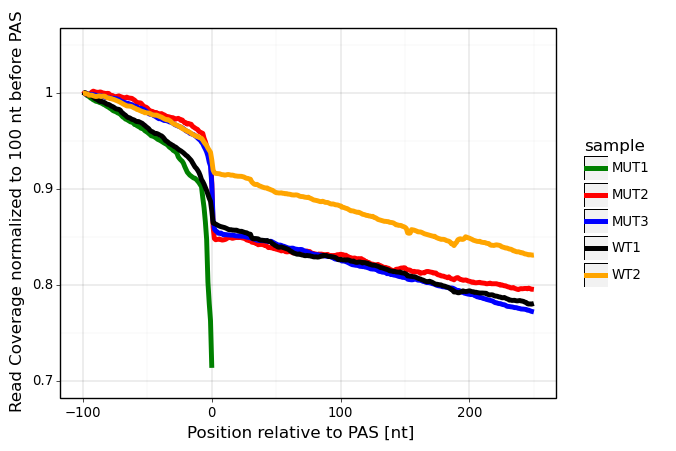

<ggplot: (2985334804053)>

In [32]:
# plot read coverage past PAS
#my_colours = ['#43006A', '#FBC17D', '#81176D','black', 'orange']
my_colours = ["green", "red", "blue", "black", "orange"]
plt_PAS_coverage = (ggplot
     (data = Coverage_WT1_2_MUT1_2_3, mapping=aes( x = 'rel_position', y = 'normalized_count', colour = 'sample')) + 
      geom_line(size = 2, stat = 'identity') +
      scale_colour_manual(values = my_colours) + 
      theme_linedraw(base_size = 12) +
      xlab('Position relative to PAS [nt]') +
      ylim(0.7,1.05) +
      xlim(-100, 250) +
      ylab('Read Coverage normalized to 100 nt before PAS'))
plt_PAS_coverage

In [48]:
# plot PROseq coverage downstream of TES
# NOTE: THIS INPUT FILE IS FROM CLAUDIA WITHOUT INTRON IDS
proseq_tes = pd.read_csv('Figure 6C_Log2 transformed PRO-seq Signal aroundTES Violin Plot Test.txt', sep = '\t')
proseq_tes.columns = ['<0.6', '0.6-0.79', '0.8-0.99', '1']
proseq_tes_long = proseq_tes.melt(value_vars = ['<0.6', '0.6-0.79', '0.8-0.99', '1'], value_name = 'PROseq_counts', var_name = 'CoSE')
cat_type = CategoricalDtype(categories=['<0.6', '0.6-0.79', '0.8-0.99', '1'], ordered=True) # turn category column into a category variable in order to control order of plotting
proseq_tes_long['CoSE'] = proseq_tes_long['CoSE'].astype(cat_type)

### Figure S7D

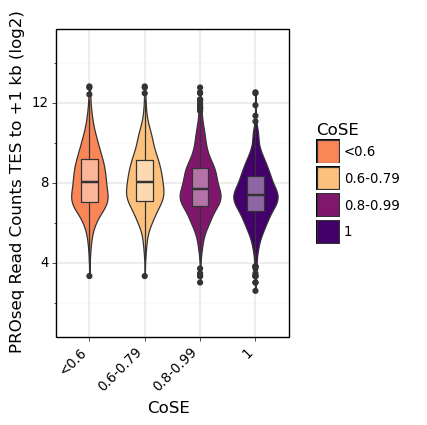

<ggplot: (8763750386289)>

In [49]:
my_colours = ['#FA8657', '#FBC17D', '#81176D', '#43006A']
plt_cose_TESPROseq = (ggplot
     (data=proseq_tes_long, mapping=aes( x='CoSE', y = 'PROseq_counts', fill = 'CoSE')) + 
      geom_violin(width = 0.8) +
      geom_boxplot(width = 0.3, fill = 'white', alpha = 0.4) +
      theme_linedraw(base_size = 12) +
      theme(axis_text_x=element_text(rotation=45, hjust=1)) +
#       theme(figure_size = (2.5,4)) +
      theme(figure_size = (3,4)) +
      ylab('PROseq Read Counts TES to +1 kb (log2)') +
      ylim(1, 15) +
#       scale_y_log10(limits = (0.000001, 5)) +
#       scale_y_log10() +
      scale_fill_manual(values = my_colours)
           )
plt_cose_TESPROseq

In [52]:
# Combine reads that have been classifed by splicing status into a single file, adding a new column to record splicing status
alldata = []
for file in dataFiles:
#     df = pd.read_csv(file, delimiter = '\t', names =  ['chr', 'start', 'end', 'name', 'score', 'strand', 'readStart', 'readEnd', 'rgb', 'blocks', 'blockSizes', 'blockStarts'])
    df = pd.read_csv(file, delimiter = '\t', names =  ['chr', 'start', 'end', 'name', 'score', 'strand', 'readStart', 'readEnd', 'rgb', 'blocks', 'blockSizes', 'blockStarts', 'status', 'treatment'])
#     splicing_status = file.split('/')[2]
#     df['status'] = splicing_status
    alldata.append(df)
data = pd.concat(alldata)

In [53]:
# Define a function to get the 5' end coordiates for each read
def get_5end_coord(df):
    plus = df.loc[df['strand'] == '+']
    minus = df.loc[df['strand'] == '-']
    columns = ['chr', 'start', 'end', 'name', 'score', 'strand', 'readStart', 'readEnd', 'rgb', 'blocks', 'blockSizes', 'blockStarts', 'status', 'treatment']
    
    plus['end'] = plus['start'] + 1
    plus_out = plus[columns]
    
    minus['start'] = minus['end'] - 1
    minus_out = minus[columns]
    
    out = pd.concat([plus_out, minus_out])
    
    out.to_csv('data_combined_5end.bed', sep = '\t', index = False, header = False)

In [13]:
# Create a BED file with 5' end coordinate for combined long read data with splicing status classification
get_5end_coord(data)

In [ ]:
# Bedtools intersect 5' end of reads with active transcripts - write entire read a (IN A TERMINAL WINDOW)
################################################################################################################
# bedtools intersect -wo -s -a data_combined_5end.bed -b ../annotation_files/active_transcripts.bed > fiveEnd_intersect_active_transcripts.txt
################################################################################################################

In [54]:
# Read in result of bedtools intersect: r_ indicates read info, t_ indicates transcript annotation info
intersect = pd.read_csv('fiveEnd_intersect_active_transcripts.txt', 
                      delimiter = '\t', 
                      names =  ['r_chr', 'r_fiveEnd_start', 'r_fiveEnd_end', 'r_name', 'r_score', 'r_strand', 'r_readStart', 'r_readEnd', 'r_rgb', 'r_blocks', 'r_blockSizes', 'r_blockStarts', 'splicing_status', 'treatment', 't_chr', 't_start', 't_end', 't_name', 't_score', 't_strand', 'overlaps'])

In [55]:
# For reach row, compare whether or not the readEnd is past the transcript end, if so add 1 to cleavage status

distance_past_PAS = 50 # set cutoff distance for the read end to be past the annotated PAS

intersect_plus = intersect.loc[intersect['r_strand'] == "+"]
intersect_minus = intersect.loc[intersect['r_strand'] == "-"]

conditions_plus = [intersect_plus['r_readEnd'] > intersect_plus['t_end'].astype(int) + distance_past_PAS,
              intersect_plus['r_readEnd'] <= intersect_plus['t_end'].astype(int) + distance_past_PAS]
conditions_minus = [intersect_minus['r_readStart'] < intersect_minus['t_start'].astype(int) - distance_past_PAS,
              intersect_minus['r_readStart'] >= intersect_minus['t_start'].astype(int) - distance_past_PAS]

outputs = [1,0]
intersect_plus['uncleaved'] = np.select(conditions_plus, outputs, np.NaN)
intersect_minus['uncleaved'] = np.select(conditions_minus, outputs, np.NaN)
i = pd.concat([intersect_plus, intersect_minus])

g = i.groupby('r_name').agg({'uncleaved':'sum', # count the number of reads with 3' end past transcript PAS
                             'splicing_status':'first', # record splicing status for each read
                             'treatment':'first', # record treatment condiditon for each read
                             'overlaps':'sum'}) # count the total number of transcript overlaps

g['cleavage_ratio'] = g['uncleaved']/g['overlaps'] # calculate how many times a transcript is called as uncleaved for all of the transcript annotations that it overlaps
g['cleavage_status'] = np.where(g['cleavage_ratio'] ==1,'uncleaved', 'cleaved') # only classify a read as "uncleaved" if the 3' end is past the PAS for ALL transcript annotations that it overlaps with

In [56]:
# Calculate fraction of reads that are in each splicing category for cleaved/uncleaved reads
total_uncleaved = len(g.loc[g['cleavage_status'] == 'uncleaved'])
total_cleaved = len(g.loc[g['cleavage_status'] == 'cleaved'])

all_spliced_cleaved = len(g.loc[(g['splicing_status'] == 'all_spliced') & (g['cleavage_status'] == 'cleaved')])
partially_spliced_cleaved = len(g.loc[(g['splicing_status'] == 'partially_spliced') & (g['cleavage_status'] == 'cleaved')])
all_unspliced_cleaved = len(g.loc[(g['splicing_status'] == 'all_unspliced') & (g['cleavage_status'] == 'cleaved')])

all_spliced_uncleaved = len(g.loc[(g['splicing_status'] == 'all_spliced') & (g['cleavage_status'] == 'uncleaved')])
partially_spliced_uncleaved = len(g.loc[(g['splicing_status'] == 'partially_spliced') & (g['cleavage_status'] == 'uncleaved')])
all_unspliced_uncleaved = len(g.loc[(g['splicing_status'] == 'all_unspliced') & (g['cleavage_status'] == 'uncleaved')])

data_list = [['uncleaved', 'all_spliced', all_spliced_uncleaved, total_uncleaved],
             ['uncleaved', 'partially_spliced', partially_spliced_uncleaved, total_uncleaved],
             ['uncleaved', 'all_unspliced', all_unspliced_uncleaved, total_uncleaved],
             ['cleaved', 'all_spliced', all_spliced_cleaved, total_cleaved],
             ['cleaved', 'partially_spliced', partially_spliced_cleaved, total_cleaved],
             ['cleaved', 'all_unspliced', all_unspliced_cleaved, total_cleaved]]

# Create the pandas DataFrame 
df = pd.DataFrame(data_list, columns = ['cleavage_status', 'splicing_status', 'count', 'total']) 
df['fraction'] = df['count']/df['total']
df

,cleavage_status,splicing_status,count,total,fraction
0,uncleaved,all_spliced,2822,5694,0.495609
1,uncleaved,partially_spliced,440,5694,0.077274
2,uncleaved,all_unspliced,2432,5694,0.427116
3,cleaved,all_spliced,118643,172612,0.687339
4,cleaved,partially_spliced,21937,172612,0.127088
5,cleaved,all_unspliced,32032,172612,0.185572


In [57]:
print('Number of Cleaved reads: ' + str(total_cleaved))
print('Number of Uncleaved reads: ' + str(total_uncleaved))

Number of Cleaved reads: 172612
Number of Uncleaved reads: 5694


### Figure 6C

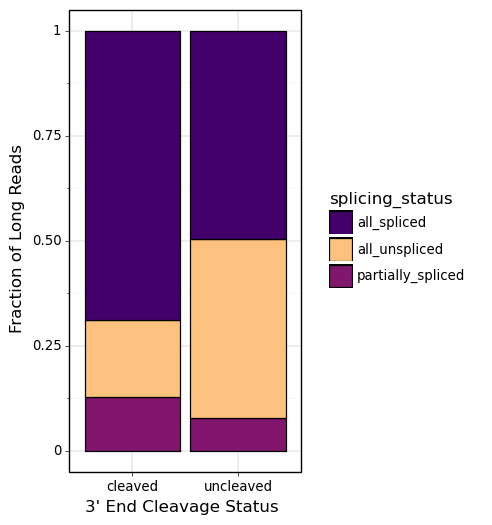

<ggplot: (8763755530525)>

In [59]:
my_colours = ['#43006A', '#FBC17D', '#81176D']
plt_splicing_cleavage_fraction = (ggplot
     (data=df, mapping=aes(x='cleavage_status', y='fraction', fill = 'splicing_status')) + 
      geom_bar(stat = 'identity', position = 'stack', colour = 'black') +
      theme_linedraw(base_size = 12) +
      theme(figure_size = (3,6)) +
      xlab("3' End Cleavage Status") +
      ylab('Fraction of Long Reads') +
      scale_fill_manual(values = my_colours)
    )
plt_splicing_cleavage_fraction

### Save output figures

In [60]:
plt_splicing_cleavage_fraction.save('fraction_uncleaved_unspliced_reads.pdf') # Fig 6C
plt_PAS_coverage.save('coverage_downstream_PAS_splicing_status.pdf') # Fig 6D
plt_cose_TESPROseq.save('PROseq_counts_TES_by_CoSE.pdf') # Fig S7D